# Malaria Parasite Detection Using CNN  
Malaria is an infectious disease that causes over 400,000 deaths per year.
Mosquitoes are notorious for carrying malaria
We used tensorflow dataset 'malaria' as the dataset for CNN training. The Malaria dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells from the thin blood smear slide images of segmented cells.


#Data Loading and Image Generation

In [ ]:
# Importing tensorflow and other libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


Shuffling and writing examples to /root/tensorflow_datasets/malaria/1.0.0.incompleteTBK5NT/malaria-train.tfrecord


Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


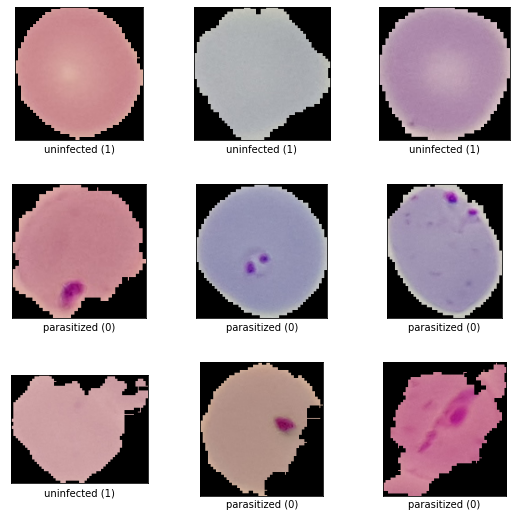

<_OptionsDataset shapes: {image: (None, None, 3), label: ()}, types: {image: tf.uint8, label: tf.int64}>


In [ ]:
# Loading Malaria dataset from tensorflow
ds, ds_info = tfds.load('malaria', split='train',shuffle_files=True ,with_info=True)
fig = tfds.show_examples(ds, ds_info)
print(ds)

(121, 115, 3) tf.Tensor(0, shape=(), dtype=int64)


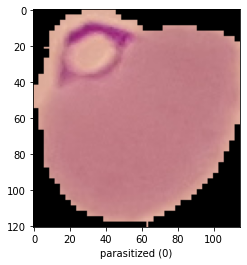

In [ ]:
# Checking a random image
for example in ds.take(1):
  image = example["image"]
  label = example["label"]
  plt.imshow(image)
  plt.xlabel("uninfected (1)" if label.numpy()==1 else "parasitized (0)")
  print(image.shape, label)

In [ ]:
# Initializing image data generator
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
img_width = 64
img_height = 64
directory = "/root/tensorflow_datasets/downloads/extracted/ZIP.ceb.nlm.nih.gov_proj_malaria_cell_imagesCLJ1vGxXDKcJmHnYfoar_K3ipRQWtxIVA-imvIbvBbs.zip/cell_images"
class_mode = "binary"
batch_size = 16

In [ ]:
# Creating train and validation data generator
train_data_generator = datagen.flow_from_directory(directory=directory,
                                                   target_size = (img_width, img_height),
                                                   class_mode = class_mode,
                                                   batch_size = batch_size,
                                                   subset = 'training'
                                                   )

validation_data_generator = datagen.flow_from_directory(directory=directory,
                                                   target_size = (img_width, img_height),
                                                   class_mode = class_mode,
                                                   batch_size = batch_size,
                                                   subset = 'validation'
                                                   )

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


We have successfully loaded and downloaded malaria dataset from tensorflow and used ImageDataGenerator class to generate the train and validation data for our CNN model. We get a balanced dataset as given in the tensorflow documentation so no more preprocessing is required.

#BUILDING CNN 

In [ ]:
# Creating a sequential CNN
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Sumarry of CNN
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [ ]:
# Compliling the CNN with adam optimizer and binary crossentropy loss
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting our CNN over train and validation data generated earlier and saving it
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))
model.save('/content/malaria_model')

In [ ]:
# Visualizing the loss and accuracy of the model over 5 epochs
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

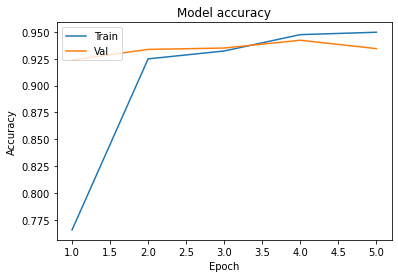

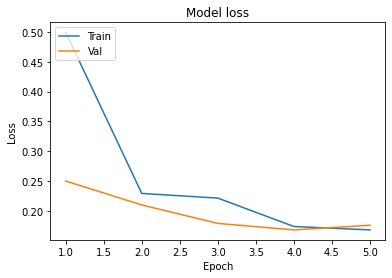

In [ ]:
plot_learningCurve(history, 5)

In [ ]:
print(f"accuracy:{history.history['accuracy'][-1]*100}%, loss:{history.history['loss'][-1]*100}%")

accuracy:94.97460126876831, loss:16.773709654808044


So a CNN model is built and fitted upon the malaria dataset with accuracy around 95% and loss around 15%

## Thank You